# DATA PROCESSING IMPORTS

In [1]:
import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

# DEEP LEARNING IMPORTS

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                     Dropout, BatchNormalization, GlobalAveragePooling2D,
                                     Activation, Input, Concatenate)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


2025-12-13 18:49:42.518476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765651782.909694      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765651783.029300      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

# Scikit-learn IMPORTS

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, 
                            accuracy_score, precision_recall_fscore_support,
                            roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import label_binarize

# EXPLORE THE DATA

### READ THE DATA 

In [4]:
folder_path = '/kaggle/input/bangladeshi-banknote-dataset/dataset'

file_names = os.listdir(folder_path)
print(f"Total files in dataset: {len(file_names)}")

numbers_outside = [
    int(re.match(r"^(\d+)", file).group(1)) 
    for file in file_names if re.match(r"^(\d+)", file)
]

unique_numbers_outside = sorted(set(numbers_outside))

df_unique = pd.DataFrame(unique_numbers_outside, columns=["Currency"])
print(df_unique)


Total files in dataset: 70542
   Currency
0         2
1         5
2        10
3        20
4        50
5       100
6       500
7      1000


### Count occurrences of each currency type

In [5]:
currency_types = []
for file in file_names:
    match = re.match(r"^(\d+)\s*\(", file)
    if match:
        currency_types.append(int(match.group(1)))

currency_counts = Counter(currency_types)

df_counts = pd.DataFrame(list(currency_counts.items()), 
                         columns=["Currency Type", "Count"])
df_counts = df_counts.sort_values(by="Currency Type")

print(df_counts)
print(f"Number of Classes: {len(df_counts)}")

   Currency Type  Count
4              2   5105
6              5   6389
1             10   8382
2             20  14188
7             50   9837
0            100   6999
3            500  11927
5           1000   7715
Number of Classes: 8


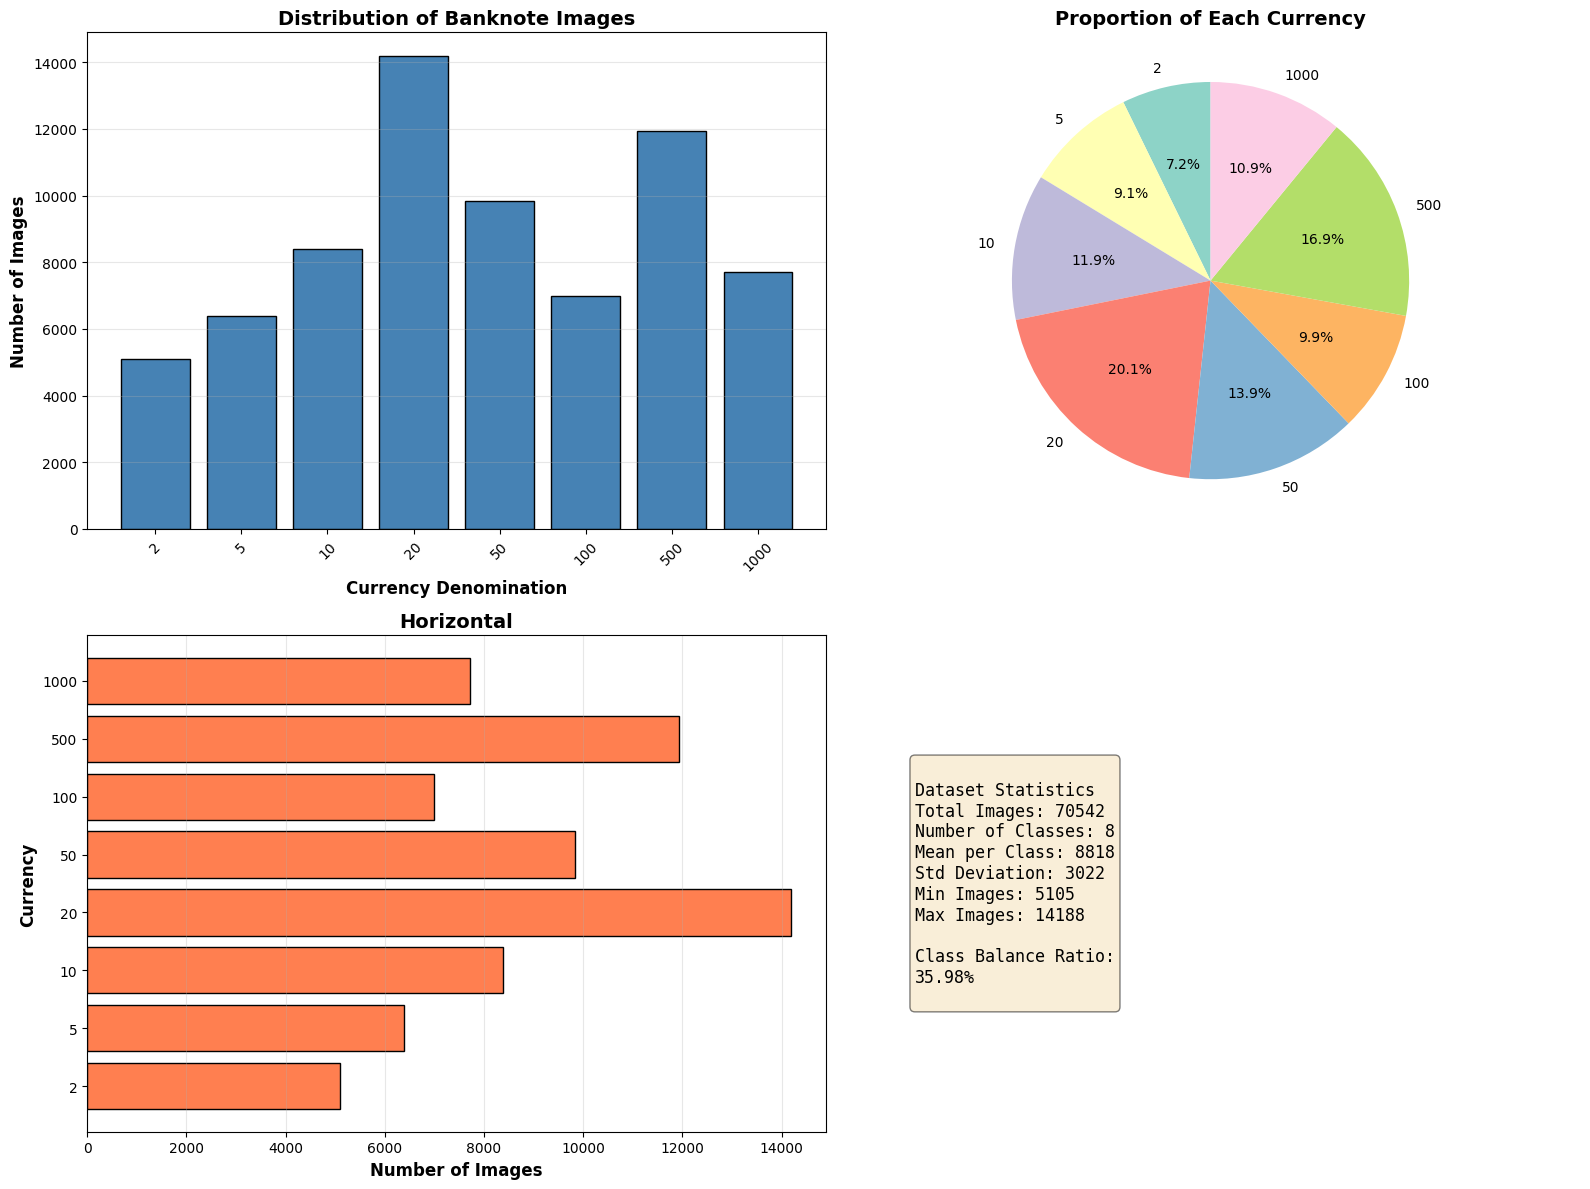

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].bar(df_counts['Currency Type'].astype(str), df_counts['Count'], 
               color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Currency Denomination', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Distribution of Banknote Images', 
                     fontsize=14, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

colors = plt.cm.Set3(range(len(df_counts)))
axes[0, 1].pie(df_counts['Count'], labels=df_counts['Currency Type'], 
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Proportion of Each Currency', 
                     fontsize=14, fontweight='bold')

axes[1, 0].barh(df_counts['Currency Type'].astype(str), df_counts['Count'], 
                color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Number of Images', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Currency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Horizontal', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

stats_text = f"""
Dataset Statistics
Total Images: {df_counts['Count'].sum()}
Number of Classes: {len(df_counts)}
Mean per Class: {df_counts['Count'].mean():.0f}
Std Deviation: {df_counts['Count'].std():.0f}
Min Images: {df_counts['Count'].min()}
Max Images: {df_counts['Count'].max()}

Class Balance Ratio:
{(df_counts['Count'].min() / df_counts['Count'].max()):.2%}
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', 
                facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()